## Visualize features

In [1]:
import os
import sys
import numpy as np
import pandas as pd
#from nilearn.image import load_img, threshold_img, math_img, resample_to_img
#from scipy.ndimage.morphology import binary_erosion
#from scipy.signal import periodogram
#from os.path import join, pardir
#sys.path.append(pardir)
#from bids import BIDSLayout
#from tqdm import tqdm

# plotting
import matplotlib.pyplot as plt
import seaborn as sb
from nilearn.plotting import plot_img
from nilearn.masking import intersect_masks, apply_mask

/LOCAL/jzerbe/testenv/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


### Multiple plots

In [30]:
# Paths
df_faces = pd.read_csv(r'/LOCAL/jzerbe/code/ICA-fMRI/results/df_features_faces-vs-houses.csv')
df_emotion = pd.read_csv(r'/LOCAL/jzerbe/code/ICA-fMRI/results/df_features_emotion-category.csv')
df_auditory = pd.read_csv(r'/LOCAL/jzerbe/code/ICA-fMRI/results/df_features_auditory-vs-visual.csv')

<AxesSubplot:xlabel='hfc', ylabel='Density'>

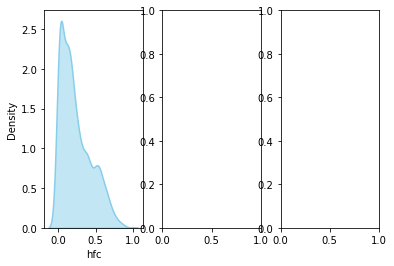

In [43]:
# define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 3)

#create density plot in each subplot
df_faces_MNI6 = df_faces[df_faces['space'] == 'MNI152NLin6Asym']
sb.kdeplot(df_faces_MNI6['hfc'], color='skyblue', fill=True, alpha=.5, linewidth=1.5, ax=axes[0])
#ax[0].set_title('MNI152NLin6Asym')


#sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
#sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
#sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1,0])
#sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])

In [ ]:
# Single plot per dataset
sb.kdeplot(subplot_spaces['hfc'], color='skyblue', fill=True, alpha=.5, linewidth=1.5)
plt.title(f'HFC | {fig_name} | {fig_space}')
plt.savefig(fig_path + f'{fig_name}_hfc_{fig_space}_density' + '.jpg')

### Single plots

In [10]:
# Paths 1/2
# '/LOCAL/jzerbe/code/ICA-fMRI/results/df_features_faces_vs_houses.csv
# '/LOCAL/jzerbe/code/ICA-fMRI/results/df_features_emotion_category.csv
results_dir = '/LOCAL/jzerbe/code/ICA-fMRI/results/df_features_auditory_vs_visual.csv'
fig_path = '/LOCAL/jzerbe/code/ICA-fMRI/figures/'
fig_name = 'auditory-vs-visual' #'emotion-category' # 'faces-vs-houses'

In [3]:
df_raw = pd.read_csv(results_dir)
df_raw

,Unnamed: 0,subject,session,task,run,space,directory,fullpath,edgefrac,hfc
0,0,1,NaN,SESS01,NaN,MNI152NLin6Asym,sub-01_task-SESS01_space-MNI152NLin6Asym_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.189497,0.191176
1,1,1,NaN,SESS01,NaN,MNI152NLin6Asym,sub-01_task-SESS01_space-MNI152NLin6Asym_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.189497,0.191176
2,2,1,NaN,SESS01,NaN,MNI152NLin6Asym,sub-01_task-SESS01_space-MNI152NLin6Asym_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.189497,0.191176
3,3,1,NaN,SESS01,NaN,MNI152NLin6Asym,sub-01_task-SESS01_space-MNI152NLin6Asym_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.189497,0.191176
4,4,1,NaN,SESS01,NaN,MNI152NLin6Asym,sub-01_task-SESS01_space-MNI152NLin6Asym_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.189497,0.191176
...,...,...,...,...,...,...,...,...,...,...
12163,12163,56,NaN,SESS06,NaN,T1w,sub-56_task-SESS06_space-T1w_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.284397,0.222222
12164,12164,56,NaN,SESS06,NaN,T1w,sub-56_task-SESS06_space-T1w_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.284397,0.222222
12165,12165,56,NaN,SESS06,NaN,T1w,sub-56_task-SESS06_space-T1w_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.284397,0.222222
12166,12166,56,NaN,SESS06,NaN,T1w,sub-56_task-SESS06_space-T1w_melodic,/LOCAL/jzerbe/auditory_vs_visual/ds003717/deri...,0.284397,0.222222


In [5]:
# Which spaces?
df_raw['space'].unique()

array(['MNI152NLin6Asym', 'MNI152NLin2009cAsym', 'T1w'], dtype=object)

In [23]:
# Paths 2/2
fig_space = 'T1w'
subplot_spaces = df_raw[df_raw['space'] == fig_space]

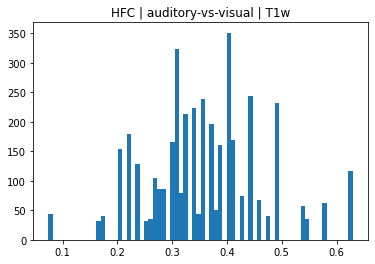

In [24]:
# Visualize hfc
hfc_plt = plt.hist(subplot_spaces['hfc'], bins=70)
plt.title(f'HFC | {fig_name} | {fig_space}')
plt.savefig(fig_path + f'{fig_name}_hfc_{fig_space}' + '.jpg')

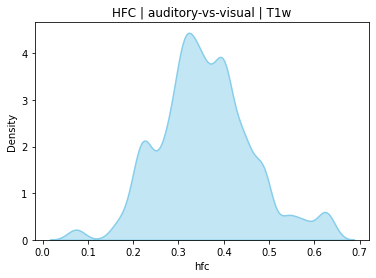

In [25]:
# Seaborn density plot
sb.kdeplot(subplot_spaces['hfc'], color='skyblue', fill=True, alpha=.5, linewidth=1.5)
plt.title(f'HFC | {fig_name} | {fig_space}')
plt.savefig(fig_path + f'{fig_name}_hfc_{fig_space}_density' + '.jpg')

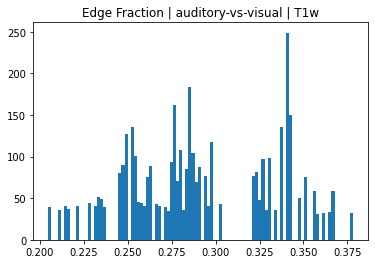

In [26]:
# Visualize edge fraction
edgefrac_plt = plt.hist(subplot_spaces['edgefrac'], bins=100)
plt.title(f'Edge Fraction | {fig_name} | {fig_space}')
plt.savefig(fig_path + f'{fig_name}_edgefrac_{fig_space}' + '.jpg')

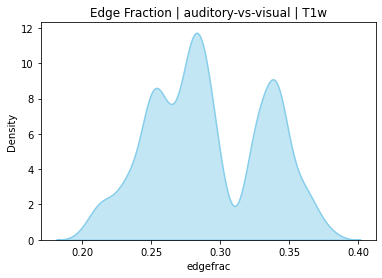

In [27]:
# Seaborn density plot
sb.kdeplot(subplot_spaces['edgefrac'], color='skyblue', fill=True, alpha=.5, linewidth=1.5)
plt.title(f'Edge Fraction | {fig_name} | {fig_space}')
plt.savefig(fig_path + f'{fig_name}_edgefrac_{fig_space}_density' + '.jpg')

# Oli explores calculating ALT features

In [ ]:
comp_f = "/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/melodic/sub-03/sub-03_ses-None_task-effort_run-None_space-T1w-melodic/stats/thresh_zstat100.nii.gz"
aseg_f = '/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/fmriprep/sub-03/func/sub-03_task-effort_space-T1w_desc-aseg_dseg.nii.gz'
bmask_f = '/LOCAL/jzerbe/faces_vs_houses/ds002938/derivatives/fmriprep/sub-03/func/sub-03_task-effort_space-T1w_desc-brain_mask.nii.gz'

In [ ]:
def aseg2gm(aseg_f):
    gm_left = math_img('img == 3', img=aseg_f)
    gm_right = math_img('img == 42', img=aseg_f)
    gm = intersect_masks([gm_left, gm_right], threshold=0, connected=False)
    return gm
gm = aseg2gm(aseg_f)

In [ ]:
def calc_gm_prop(comp_f, aseg_f, bmask_f):
    # get gm mask
    gm = aseg2gm(aseg_f)
    # count significant voxels in grey matter
    comp_gm = apply_mask(comp_f, gm)
    nsig_gm = np.sum(comp_gm > 0.)
    # counts ignificant voxels in whole brain
    comp_brain = apply_mask(comp_f, bmask_f)
    nsig_brain = np.sum(comp_brain > 0.)
    #return ratio
    gm_prop = nsig_gm / nsig_brain
    return gm_prop

In [ ]:
gm_prop

In [ ]:
# 